# Wizualizacja danych w `matplotlib` i `seaborn`

## Wykres liniowy

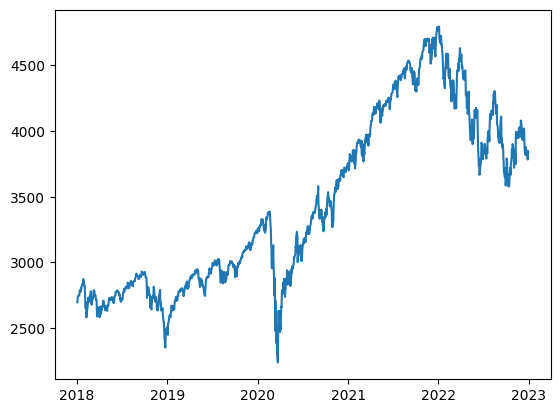

In [3]:
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv("SP500.csv", parse_dates=True, index_col="Date")

plt.plot(df.index, df.Close); # Wskazówka: jeśli jedną z osi są daty, warto zapewnić typ danych datetime

## Dodawanie wielu wykresów, tytułów, legendy

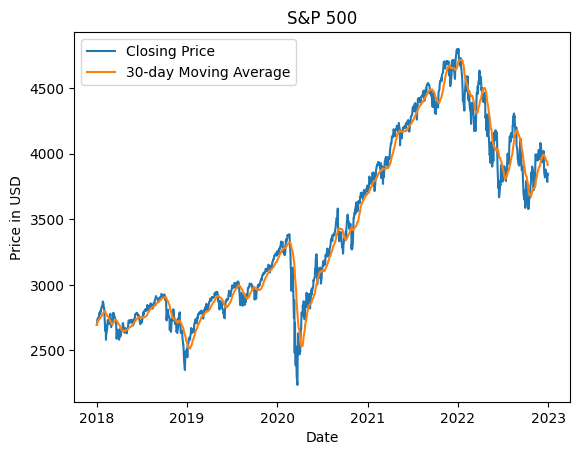

In [4]:
plt.plot(df.index, df.Close, label="Closing Price")
plt.plot(df.index, df.Close.rolling('30D').mean(), label="30-day Moving Average")

plt.title("S&P 500")
plt.xlabel("Date")
plt.ylabel("Price in USD")
plt.legend()

## Histogram

Text(0.5, 1.0, 'Histogram of Sepal Width')

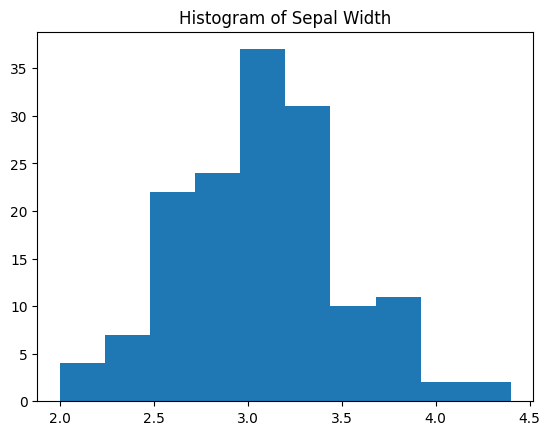

In [6]:
iris = pd.read_csv("iris.csv")

plt.hist(iris.sepal_width, bins=10)
plt.title("Histogram of Sepal Width")

## Wykres pudełkowy

/var/folders/0l/ptqddsm539s_hh0526x21_2r0000gn/T/ipykernel_49033/2407833127.py:1: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(iris.sepal_width, labels=["Sepal Width"])


{'whiskers': [<matplotlib.lines.Line2D at 0x128f20730>,
 'caps': [<matplotlib.lines.Line2D at 0x128f20c70>,
 'boxes': [<matplotlib.lines.Line2D at 0x128e21790>],
 'medians': [<matplotlib.lines.Line2D at 0x128f3a1f0>],
 'fliers': [<matplotlib.lines.Line2D at 0x128f3a490>],
 'means': []}

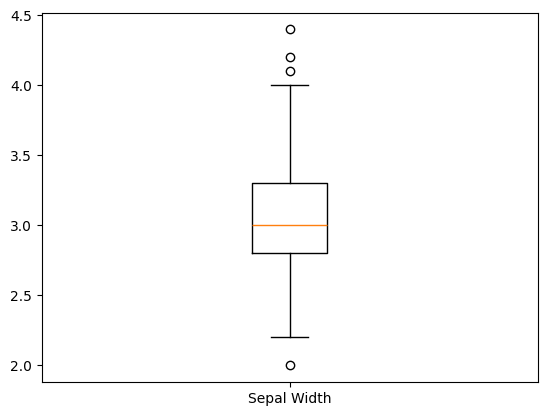

In [7]:
plt.boxplot(iris.sepal_width, labels=["Sepal Width"])

Aby stworzyć kilka wykresów pudełkowych można podać listę zawierającą kilka wektorów z danymi numerycznymi, lub `DataFrame`. Parametr `vert` pozwala rysować wykres w pionie lub poziomie.

/var/folders/0l/ptqddsm539s_hh0526x21_2r0000gn/T/ipykernel_49033/2404023663.py:3: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(iris_numeric, labels=tick_labels, vert=False)


{'whiskers': [<matplotlib.lines.Line2D at 0x128fab0a0>,
 'caps': [<matplotlib.lines.Line2D at 0x128fab610>,
 'boxes': [<matplotlib.lines.Line2D at 0x128f98dc0>,
 'medians': [<matplotlib.lines.Line2D at 0x128fabb50>,
 'fliers': [<matplotlib.lines.Line2D at 0x128fabdf0>,
 'means': []}

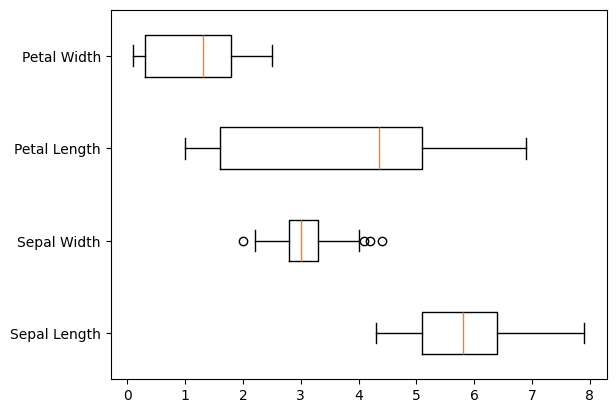

In [8]:
iris_numeric = iris.drop("variety", axis=1)
tick_labels = iris_numeric.columns.str.replace("_", " ").str.title()
plt.boxplot(iris_numeric, labels=tick_labels, vert=False)

## Wykres słupkowy
Wykres słupkowy pionowy tworzymy metodą `plt.bar()`, a poziomy `plt.barh()`. Na wykresie możemy zaznaczyć błędy pomiaru podając `yerr`, lub `xerr` - w tym przypadku zaznaczam 2SE (przybliżona szerokość 95% przedziału ufności). W poniższym przykładzie ilustruję też dodawanie napisów metodą `plt.annotate()`.

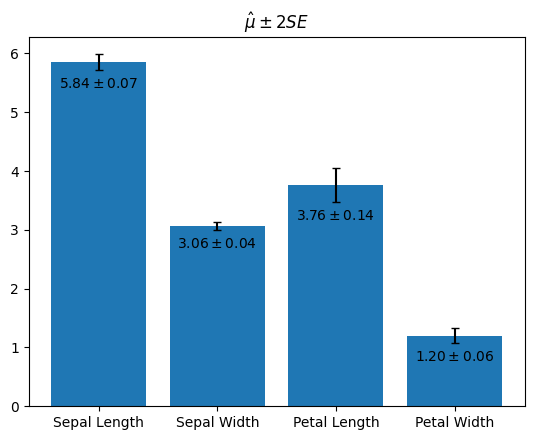

In [9]:
SE = iris_numeric.apply(lambda x: x.std()/(x.size**0.5), axis=0) # SE = sigma/sqrt(n)

plt.bar(iris_numeric.columns, iris_numeric.mean(), yerr=2*SE, capsize=3)

plt.title(r"$\hat{\mu} \pm 2SE$")
tick_labels = iris_numeric.columns.str.replace("_", " ").str.title()
plt.xticks(ticks=iris_numeric.columns, labels=tick_labels)

for col in iris_numeric:
    mu = iris_numeric[col].mean()
    plt.annotate(text=f"${mu:.2f} \\pm {SE[col]:.2f}$", 
                 xy=(col, mu-2*SE[col]-0.3), 
                 horizontalalignment='center')

## Wykres punktowy

Text(0, 0.5, 'Petal Width')

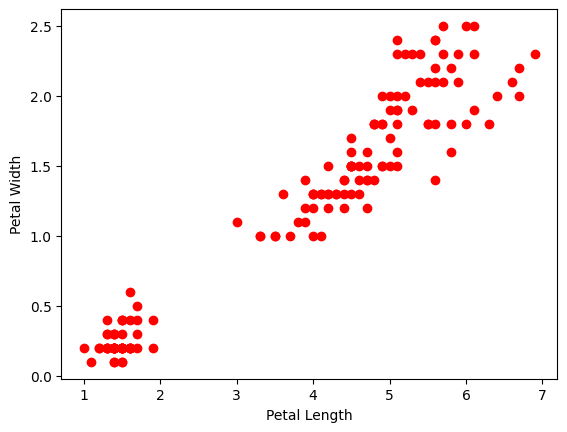

In [10]:
plt.scatter(x="petal_length", y="petal_width", c="r", data=iris)
plt.xlabel("Petal Length")
plt.ylabel("Petal Width")

## Dodawanie koloru do wykresu
W przykładzie powyżej ustawiliśmy czerwony kolor punktów podając `c="r"`. Możliwe jest także podanie wektora zawierającego kolor każdego punktu.

Text(0, 0.5, 'Petal Width')

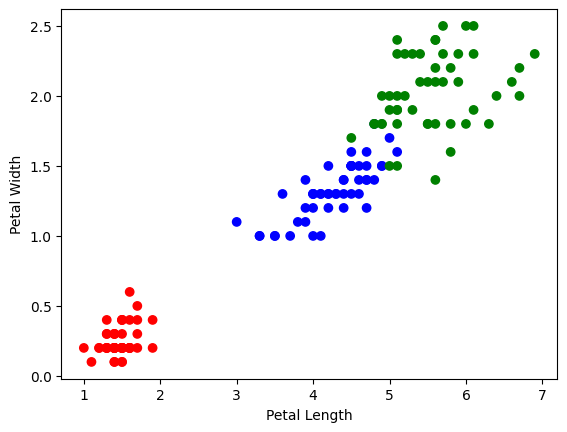

In [11]:
color = iris.variety.map({"Setosa": "r", "Versicolor": "b", "Virginica": "g"})

plt.scatter(x="petal_length", y="petal_width", c=color, data=iris)
plt.xlabel("Petal Length")
plt.ylabel("Petal Width")

Alternatywną metodą jest podanie kodów 0, 1, 2, ..., które zostaną automatycznie mapowane na kolory. Takie kody można wygenerować np. metodą `factorize()`. Opcjonalnie można podać mapę kolorów `cmap` ([więcej o mapach kolorów](https://matplotlib.org/stable/tutorials/colors/colormaps.html)).

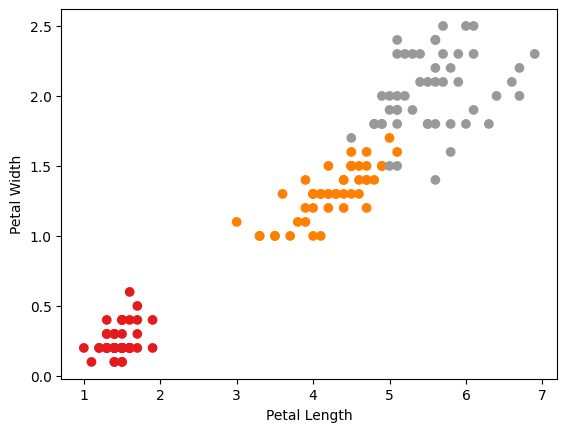

In [12]:
codes, uniques = iris.variety.factorize()
plt.scatter(x="petal_length", y="petal_width", c=codes, cmap='Set1', data=iris)
plt.xlabel("Petal Length")
plt.ylabel("Petal Width");

Mapowanie kolumny kategorycznej na kolor jest dużo prostsze w Seaborn:

Text(0, 0.5, 'Petal Width')

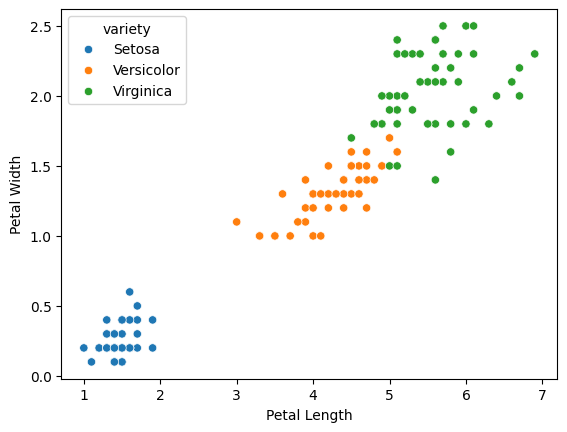

In [14]:
import seaborn as sns
sns.scatterplot(x="petal_length", y="petal_width", hue="variety", data=iris)
plt.xlabel("Petal Length")
plt.ylabel("Petal Width")

Działa to też np. w `sns.boxplot()` (dane trzeba przedtem wstępnie przekształcić w format 'długi').

<Axes: xlabel='Measurement', ylabel='Value'>

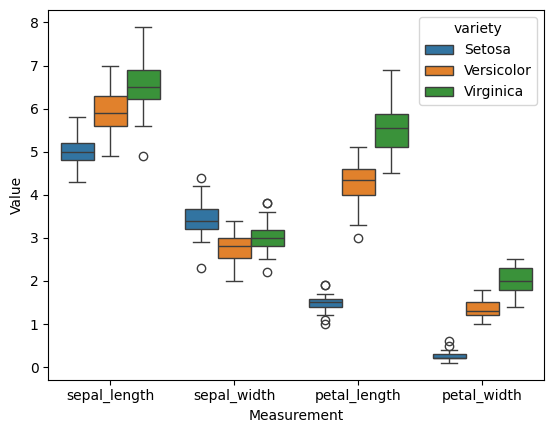

In [15]:
iris_long = iris.melt(id_vars="variety", 
                      value_vars=iris.columns[:-1], 
                      var_name="Measurement", 
                      value_name="Value")
sns.boxplot(x=iris_long.Measurement, 
            y=iris_long.Value, 
            hue=iris_long.variety, 
            orient='v')

## `subplots()`
Aby tworzyć wiele wykresów na jednej figurze wykorzystujemy metodę `plt.subplots()` podając jako argumenty liczbę wierszy i kolumn. Metoda zwraca obiekt `Figure` i `np.array` zawierający odpowiednie osie (`Axes`), na których możemy tworzyć wykresy tymi samymi metodami, które są dostępne bezpośrednio w `plt`. Często metoda `subplots()` jest przydatna nawet jeśli tworzymy tylko jeden wykres, ponieważ daje kontrolę nad parametrami figury (możemy np. ustawić jej rozmiar).

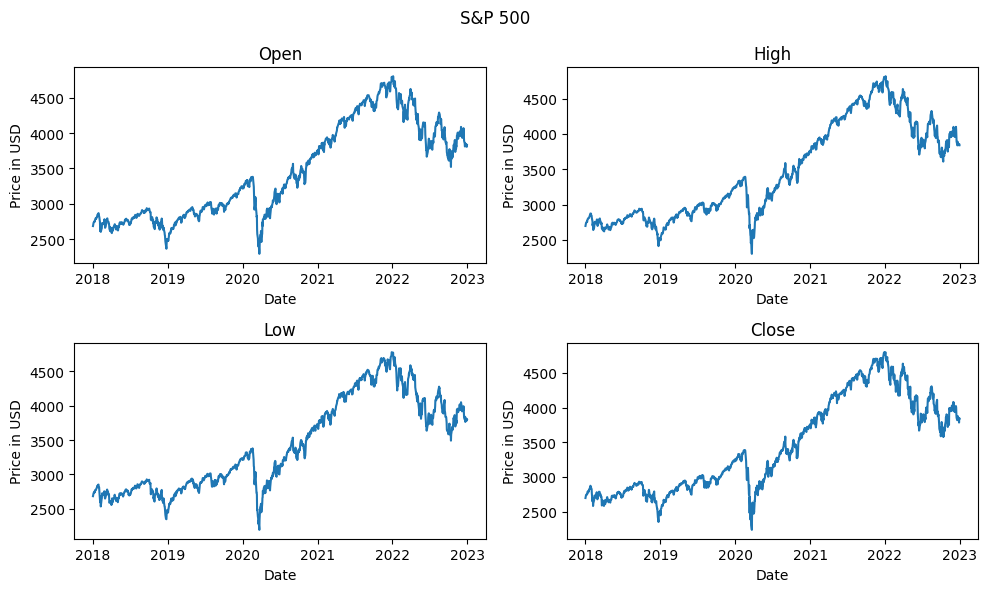

In [16]:
fig, axes = plt.subplots(2, 2, figsize=(10, 6)) # Rozmiar w calach

for col, ax in zip(df.columns[:4], axes.ravel()):
    ax.plot(df.index, df[col])
    ax.set_title(col)
    ax.set_xlabel("Date")
    ax.set_ylabel("Price in USD")

fig.suptitle("S&P 500")
fig.tight_layout() # Zapewnia miejsce na tytuły wykresów

## `pairplot()`
Bardzo przydatnym narzędziem we wstępnej eksploracji danych są wykresy par zmiennych, tzw. *pairplot* lub *scatter matrix*. 

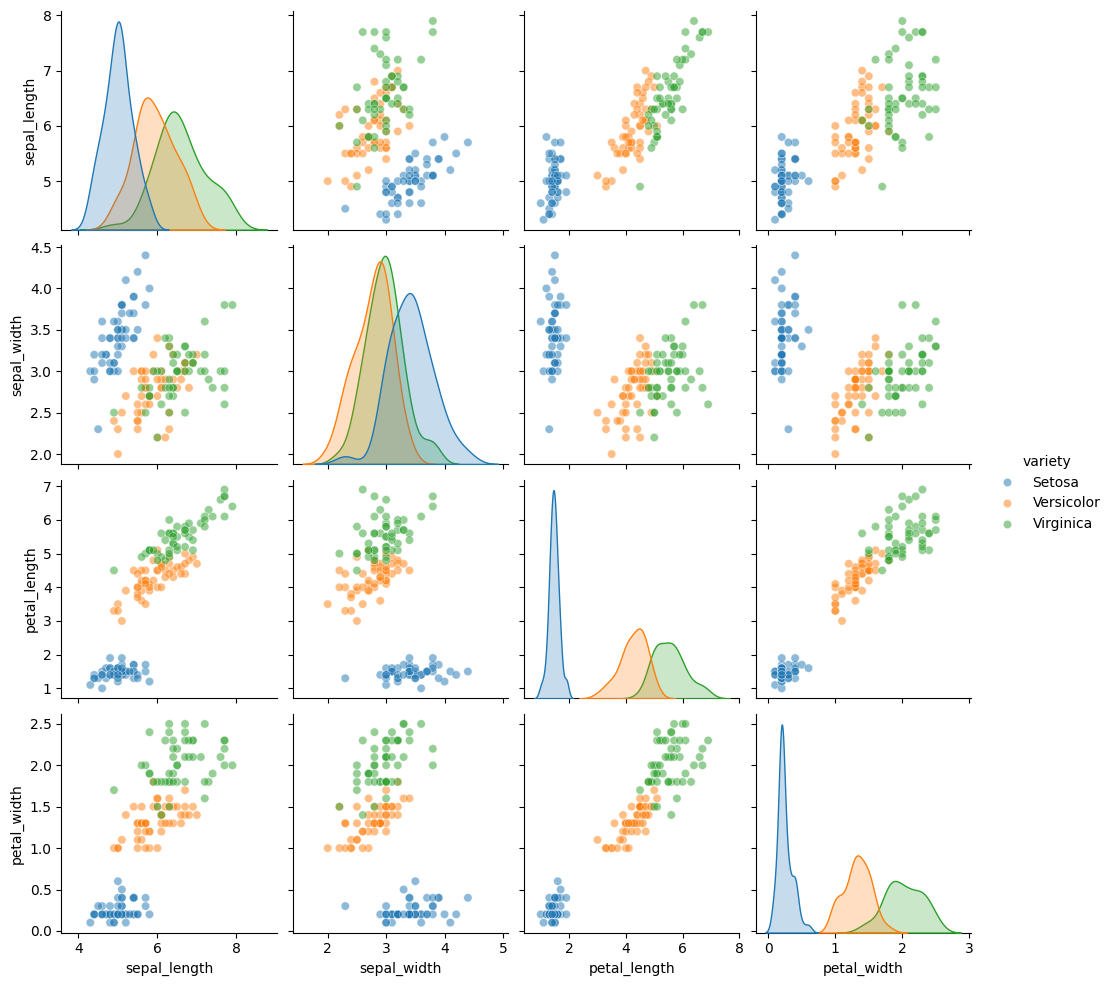

In [17]:
sns.pairplot(data=iris, hue="variety", plot_kws={'alpha': 0.5})

W niektóych przypadkach, np. kiedy mamy bardzo wiele zmiennych, wygodniej jest zwizualizować macierz korelacji. Nadaje się do tego wykres `heatmap`.

Text(0.5, 1.0, 'Correlation Matrix')

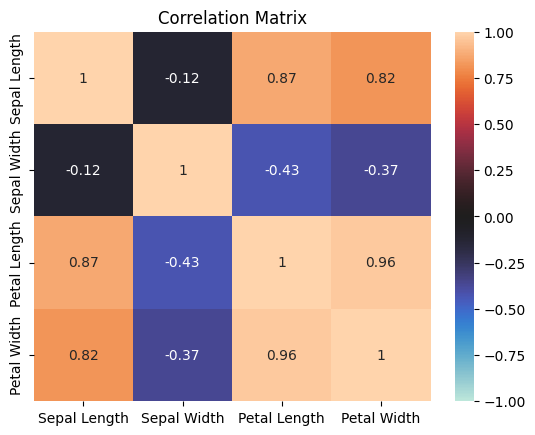

In [18]:
tick_labels = iris_numeric.columns.str.replace("_", " ").str.title()
sns.heatmap(data=iris.corr(numeric_only=True), 
            vmin=-1, 
            vmax=1, 
            annot=True, 
            center=0, 
            xticklabels=tick_labels, 
            yticklabels=tick_labels)
plt.title("Correlation Matrix")

## Zadania

1. Wczytaj plik `SP500.csv`, a następnie:
    - Stwórz histogram dziennych obrotów (`Volume`). Wybierz odpowiednią liczbę koszyków parametrem `bins`. Sprawdź w [dokumentacji `hist()`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html), jak stworzyć histogram gęstości.
    - Rozkład dziennych obrotów wizualizuj także za pomocą wykresu pudełkowego.
    - Wskazówka: bardziej czytelne będą wykresy dla dziennych obrotów w mln szt. (`Volume / 10e6`). W przypadku skalowania danych, pamiętaj o zaznaczeniu tego na wykresie (np. w opisie osi).

2. Wczytaj plik `waw_weather_monthly.csv`, a następnie:
    - Stwórz wykres słupkowy (`plt.bar()`) przedstawiający amplitudę średnich temperatur w każdym miesiącu (Tmax - Tmin).
    - Stwórz podobny wykres, tak aby podstawą słupków była temperatura minimalna (sprawdź w [dokumentacji](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.bar.html), jak to zrobić). Ustaw odpowiedni zakres osi y (`plt.ylim()`)
    - Pamiętaj o dodaniu odpowiednich opisów osi i tytułów. Aby nazwy miesięcy były czytelne, należy je obrócić (np. `plt.xticks(rotation=90)`).
    - Opcjonalnie: Dodaj anotacje (`plt.annotate()`) z minimalną i maksymalną wartością temperatury pod i nad każdym słupkiem.

3. Wczytaj plik `world_bank_co2.csv`, a następnie:
    - Stwórz wykres punktowy pokazujący zależność między `GDP/capita, PPP` a `CO2/capita` za pomocą `plt.scatter()`.
    - Stwórz podobny wykres za pomocą `sns.scatterplot()`, tak aby kolory punktów (`hue`) odpowiadały regionom, a rozmiary (`size`) populacji (w mln).
    - Wskazówka: często wykresy punktowe są czytelniejsze po odpowiednim dobraniu parametru `alpha`.

4. Użyj `subplots()` aby manualnie stworzyć wykres par dla danych `iris` podobny do tego z przykładu powyżej. Podanie parametrów `sharex`, `sharey` pozwala współdzielić osie wykresów. Dodaj opisy do osi zewnętrznych wykresów (metodą `ax.set_title()`). Nie jest wymagane rysowanie histogramów na przekątnej. W przypadku dużego zagęszczenia punktów na wykresie warto zmniejszyć parametr `alpha`.

## Zadanie 1

In [20]:
sp500 = pd.read_csv("SP500.csv", parse_dates=True, index_col="Date")
sp500.head(10)

,Open,High,Low,Close,Volume
Date,,,,,
2018-01-02,2683.73,2695.89,2682.36,2695.81,1.870694e+09
2018-01-03,2697.85,2714.37,2697.77,2713.06,1.965922e+09
2018-01-04,2719.31,2729.29,2719.07,2723.99,2.052922e+09
2018-01-05,2731.33,2743.45,2727.92,2743.15,1.798122e+09
2018-01-08,2742.67,2748.51,2737.60,2747.71,1.801472e+09
2018-01-09,2751.15,2759.14,2747.86,2751.29,1.918600e+09
2018-01-10,2745.55,2750.80,2736.06,2748.23,1.986861e+09
2018-01-11,2752.97,2767.56,2752.78,2767.56,2.022956e+09
2018-01-12,2770.18,2787.85,2769.64,2786.24,1.985539e+09


35

In [34]:
import numpy as np

num_of_bins = (int)(np.sqrt(len(sp500.Volume)))

Text(0, 0.5, 'Liczność')

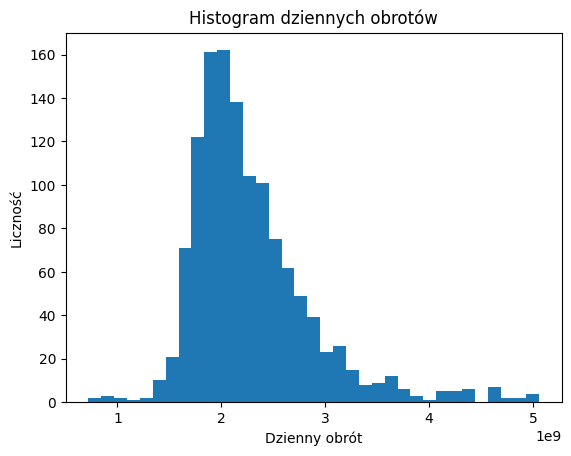

In [45]:
plt.hist(x=sp500.Volume, bins=num_of_bins)
plt.title("Histogram dziennych obrotów")
plt.xlabel("Dzienny obrót")
plt.ylabel("Liczność")

Text(0, 0.5, 'Dzienny obrót')

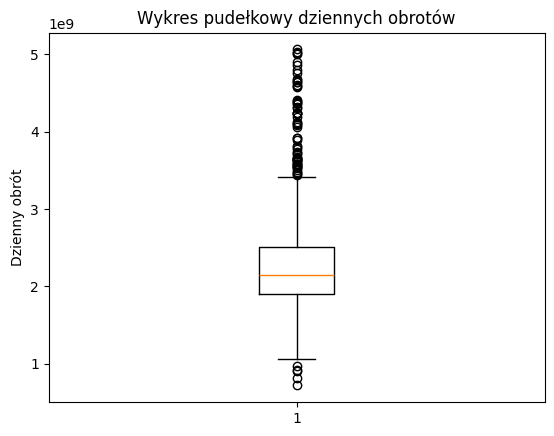

In [44]:
plt.boxplot(x=sp500.Volume)
plt.title("Wykres pudełkowy dziennych obrotów")
plt.ylabel("Dzienny obrót")

Text(0, 0.5, 'Liczność')

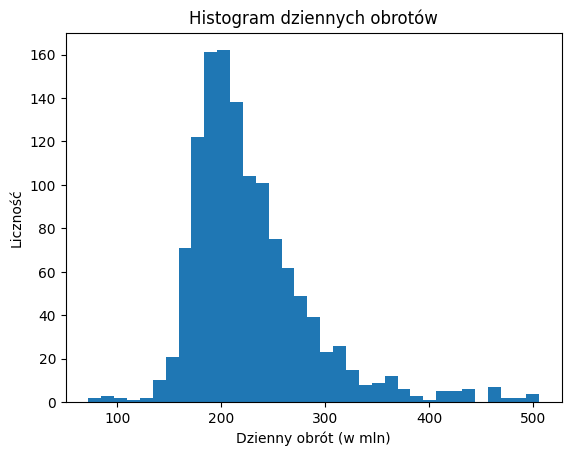

In [43]:
plt.hist(x=sp500.Volume / 10e6, bins=num_of_bins)
plt.title("Histogram dziennych obrotów")
plt.xlabel("Dzienny obrót (w mln)")
plt.ylabel("Liczność")

Text(0, 0.5, 'Dzienny obrót (w mln)')

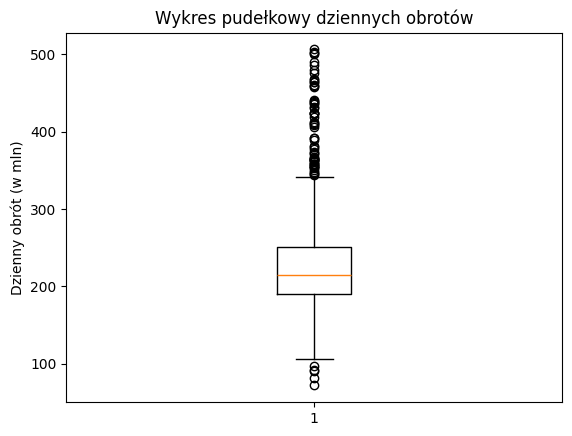

In [42]:
plt.boxplot(x=sp500.Volume / 10e6)
plt.title("Wykres pudełkowy dziennych obrotów")
plt.ylabel("Dzienny obrót (w mln)")

## Zadanie 2

In [47]:
weather = pd.read_csv("waw_weather_monthly.csv", index_col="time")
weather.head(10)

,temperature_2m_max,temperature_2m_min,apparent_temperature_max,apparent_temperature_min,precipitation_sum,windspeed_10m_max
time,,,,,,
January,2.53,-1.46,-2.08,-6.49,2.17,22.97
February,5.79,0.23,1.25,-4.45,2.26,23.91
March,7.36,-1.94,3.36,-6.14,0.14,14.35
April,10.39,2.35,6.97,-1.38,2.12,16.93
May,18.42,8.79,16.03,5.85,2.17,19.57
June,24.17,14.23,23.91,13.46,1.76,15.53
July,23.92,15.19,23.31,14.35,3.36,16.80
August,25.84,16.91,26.56,17.26,1.45,13.32
September,16.46,9.04,14.19,6.83,1.61,15.45


Text(0, 0.5, 'Amplituda średnich temperatur')

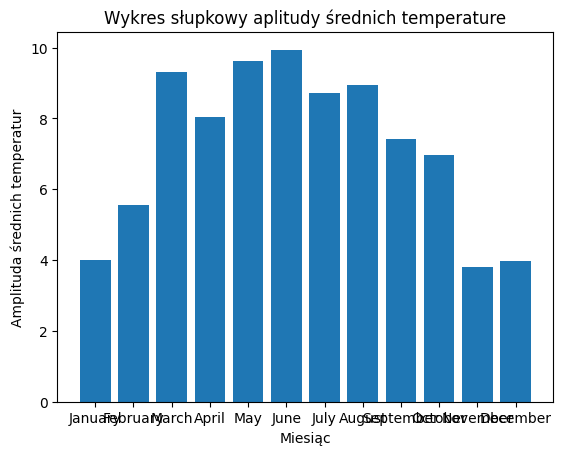

In [54]:
plt.bar(
    x=weather.index,
    height=weather.temperature_2m_max-weather.temperature_2m_min
)
plt.title("Wykres słupkowy aplitudy średnich temperature")
plt.xlabel("Miesiąc")
plt.ylabel("Amplituda średnich temperatur")

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 [Text(0, 0, 'January'),
  Text(1, 0, 'February'),
  Text(2, 0, 'March'),
  Text(3, 0, 'April'),
  Text(4, 0, 'May'),
  Text(5, 0, 'June'),
  Text(6, 0, 'July'),
  Text(7, 0, 'August'),
  Text(8, 0, 'September'),
  Text(9, 0, 'October'),
  Text(10, 0, 'November'),
  Text(11, 0, 'December')])

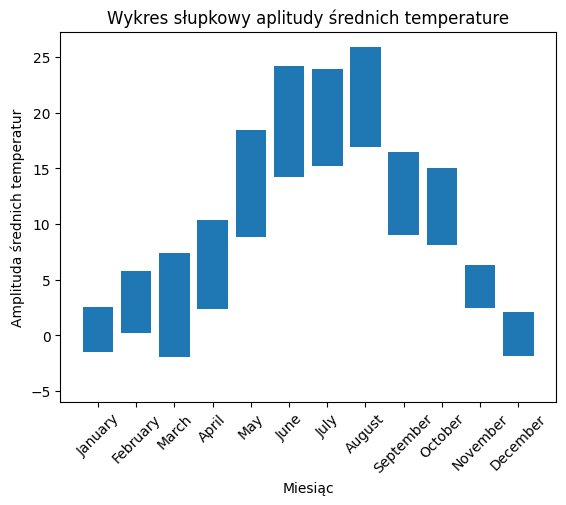

In [62]:
plt.bar(
    x=weather.index,
    height=weather.temperature_2m_max-weather.temperature_2m_min,
    bottom=weather.temperature_2m_min
)
plt.title("Wykres słupkowy aplitudy średnich temperature")
plt.xlabel("Miesiąc")
plt.ylabel("Amplituda średnich temperatur")
plt.ylim(np.min(weather.temperature_2m_min) - 4)
plt.xticks(rotation=45)

np.float64(-1.46)

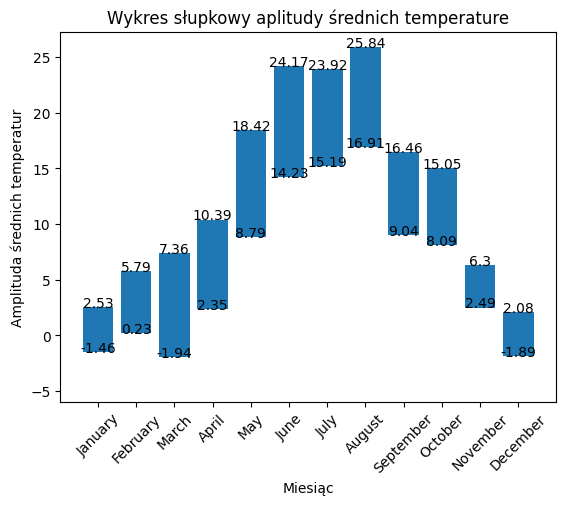

In [99]:
plt.bar(
    x=weather.index,
    height=weather.temperature_2m_max-weather.temperature_2m_min,
    bottom=weather.temperature_2m_min
)
plt.title("Wykres słupkowy aplitudy średnich temperature")
plt.xlabel("Miesiąc")
plt.ylabel("Amplituda średnich temperatur")
plt.ylim(np.min(weather.temperature_2m_min) - 4)
plt.xticks(rotation=45)

for month in weather.index:
    T_min = weather.loc[month, 'temperature_2m_min']
    T_max = weather.loc[month, 'temperature_2m_max']
    
    for T in [T_min, T_max]:
        plt.annotate(
            text=f"{T}", 
            xy=(month, T),
            horizontalalignment="center",
        )

## Zadanie 3

In [106]:
bank = pd.read_csv("world_bank_co2.csv")
bank.head(10)

,Country Name,Country Code,Region,Population,CO2/capita,"GDP/capita, PPP"
0,Afghanistan,AFG,Asia,37769499.0,0.160976,2167.704111
1,Angola,AGO,Africa,32353588.0,0.779203,6881.076241
2,Albania,ALB,Europe,2854191.0,1.692248,14407.365691
3,United Arab Emirates,ARE,Asia,9211657.0,20.502283,74811.690215
4,Argentina,ARG,Americas,44938712.0,3.740650,23003.277181
5,Armenia,ARM,Asia,2820602.0,2.187476,14921.819319
6,Antigua and Barbuda,ATG,Americas,92117.0,5.644995,24007.868485
7,Australia,AUS,Oceania,25340217.0,15.253618,51908.909873
8,Austria,AUT,Europe,8879920.0,7.293984,59756.447249
9,Azerbaijan,AZE,Asia,10024283.0,3.542398,15051.561282


Text(0, 0.5, 'CO2/capita')

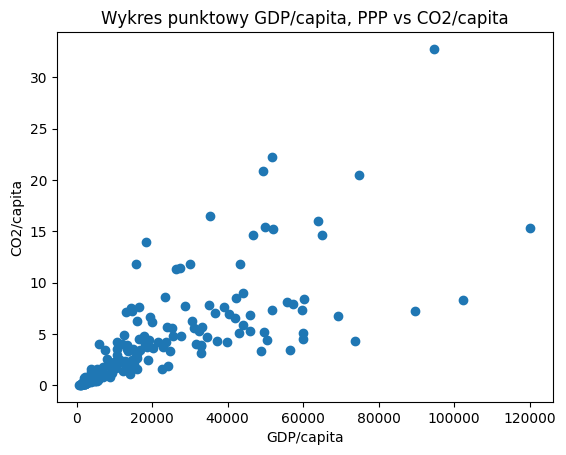

In [107]:
plt.scatter(
    x=bank.loc[:, "GDP/capita, PPP"],
    y=bank.loc[:, "CO2/capita"]
)
plt.title("Wykres punktowy GDP/capita, PPP vs CO2/capita")
plt.xlabel("GDP/capita")
plt.ylabel("CO2/capita")

[Text(0.5, 0, 'GDP/capita, PPP'),
 Text(0, 0.5, 'CO2/capita'),
 Text(0.5, 1.0, 'Wykres punktowy GDP/capita, PPP vs CO2/capita')]

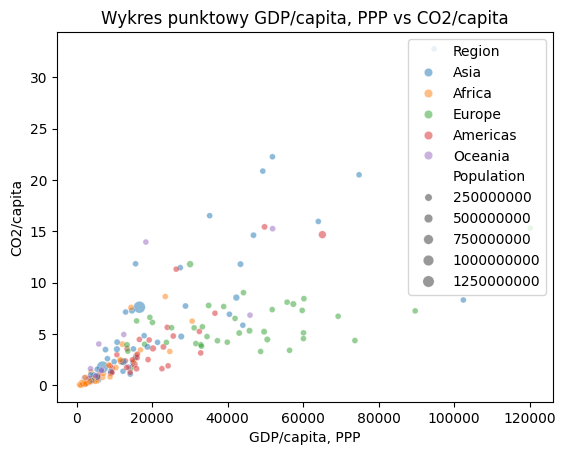

In [ ]:
plot = sns.scatterplot(
    x=bank.loc[:, "GDP/capita, PPP"].values,
    y=bank.loc[:, "CO2/capita"].values,
    hue=bank.Region,
    size=bank.Population,
    alpha=0.5,
)

plot.set(
    xlabel ="GDP/capita, PPP",
    ylabel = "CO2/capita",
    title ='Wykres punktowy GDP/capita, PPP vs CO2/capita'
)

## Zadanie 4

In [125]:
iris = pd.read_csv("iris.csv")
iris.head(10)

,sepal_length,sepal_width,petal_length,petal_width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
5,5.4,3.9,1.7,0.4,Setosa
6,4.6,3.4,1.4,0.3,Setosa
7,5.0,3.4,1.5,0.2,Setosa
8,4.4,2.9,1.4,0.2,Setosa
9,4.9,3.1,1.5,0.1,Setosa


In [212]:
iris.variety.unique()

array(['Setosa', 'Versicolor', 'Virginica'], dtype=object)

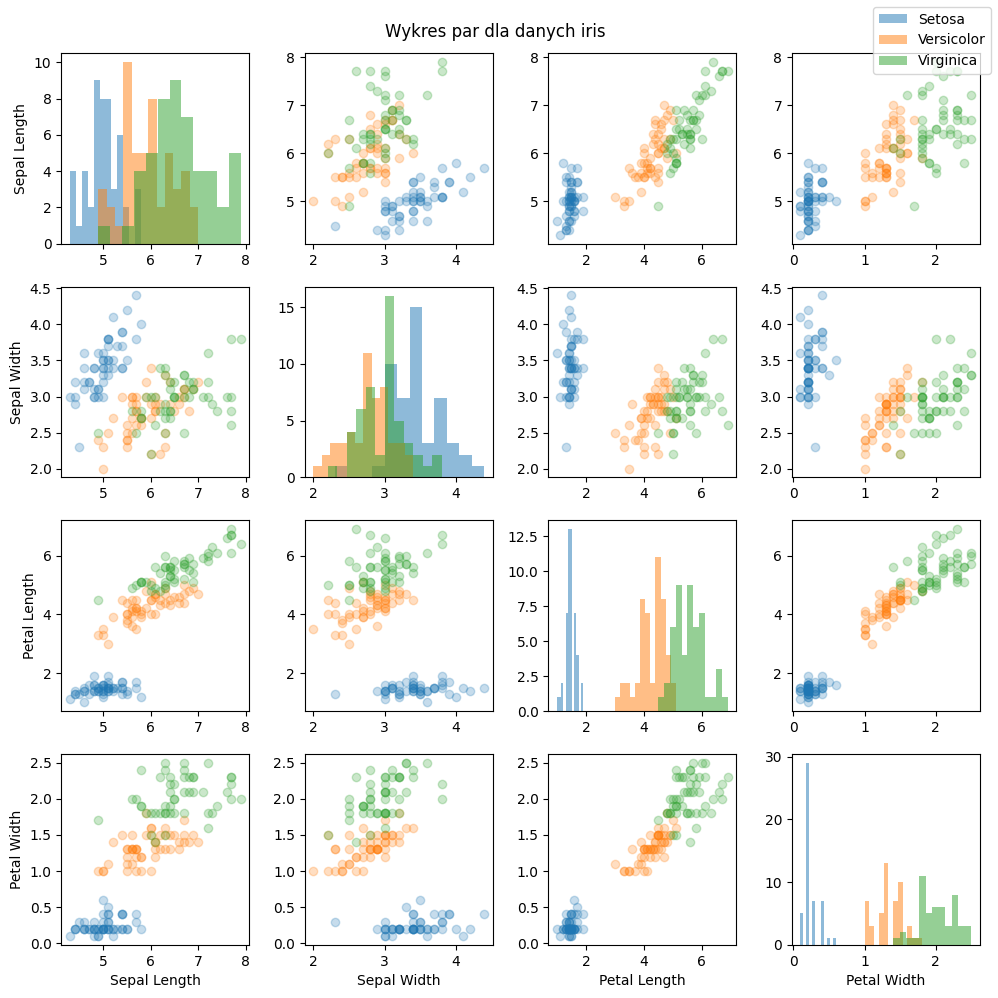

In [254]:
fig, ax = plt.subplots(
    nrows=4,
    ncols=4,
    # sharex=True,
    # sharey=True,
    figsize=(10, 10)
)

cols = iris.columns[:-1]
num_of_bins = (int)(np.sqrt(len(iris)))

for i, y_col in enumerate(cols):
    for j, x_col in enumerate(cols):        
        x_lab = x_col.replace('_', ' ').title()
        y_lab = y_col.replace('_', ' ').title()
                
        if i == 3:
            ax[i, j].set_xlabel(x_lab)
        if j == 0:
            ax[i, j].set_ylabel(y_lab)
        
        if i == j:            
            for type in iris.variety.unique():
                ax[i, j].hist(
                    x=iris[iris.variety == type][x_col],
                    bins=num_of_bins,
                    alpha=0.5,
                )
        else:
            for type in iris.variety.unique():
                ax[i, j].scatter(
                    x=iris[iris.variety == type][x_col],
                    y=iris[iris.variety == type][y_col],
                    alpha=0.25
                )
                ax[i, j].set_xlim
            
fig.legend(["Setosa", "Versicolor", "Virginica"])   
fig.suptitle("Wykres par dla danych iris")
fig.tight_layout()

In [ ]:
# 